In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.dates as mdates

In [21]:
pm15=pd.read_csv("../Archivos/2015.csv",header=[0,1],index_col=[0] ,parse_dates=[[0,1]],keep_default_na=False)
pm15=pm15.drop(pm15.index[0])
pm16=pd.read_csv("../Archivos/2016.csv",header=[0,1],index_col=[0] ,parse_dates=[[0,1]],keep_default_na=False)
pm16=pm16.drop(pm16.index[0])
pm17=pd.read_csv("../Archivos/2017.csv",header=[0,1],index_col=[0] ,parse_dates=[[0,1]],keep_default_na=False)
pm17=pm17.drop(pm17.index[0])
pm18=pd.read_csv("../Archivos/2018.csv",header=[0,1],index_col=[0] ,parse_dates=[[0,1]],keep_default_na=False)
pm18=pm18.drop(pm18.index[0])
pm19=pd.read_csv("../Archivos/2019.csv",header=[0,1],index_col=[0] ,parse_dates=[[0,1]],keep_default_na=False)
pm19=pm19.drop(pm19.index[0])
pm20=pd.read_csv("../Archivos/2020.csv",header=[0,1],index_col=[0] ,parse_dates=[[0,1]],keep_default_na=False)
pm20=pm20.drop(pm20.index[0])
frames=[pm15,pm16,pm17,pm18,pm19,pm20]
PM=pd.concat(frames,axis=0)
PM= PM.replace(np.nan, '')
export_csv=PM.to_csv("todojuntocreo.csv")

In [19]:
estacion="NOROESTE"

years=['2015','2016','2017','2018','2019']
PM_year=PM[estacion].resample("Y").mean()
PM_year["year"]=years
PM_year.set_index("year",inplace=True)

PM_year



TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

In [3]:
#PROMEDIOS 

#"Y" para anual
years=['2015','2016','2017','2018','2019']
PM_year=PMs.resample("Y").mean()
PM_year["year"]=years
PM_year.set_index("year",inplace=True)

#"M" para mensual "MS" para que use el principio del mes
PM_month=PMs.resample("MS").mean()
AOD_month=AOD.resample("MS").mean()

#"W" para semanal
PM_week=PMs.resample("W").mean()

#"D" para diario
PM_day=PMs.resample("D").mean()

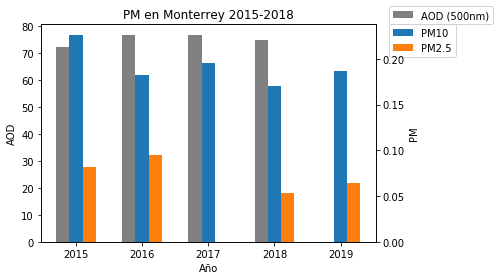

In [24]:
#AÑO
w=0.20
x=np.arange(len(PM_year.index))
y=np.arange(len(AOD_year.index))
fig=plt.figure()
ax=fig.add_subplot(111)
ax1=ax.twinx()
ax.bar(x,PM_year["PM10"],w,label="PM10")
ax.bar(x+w,PM_year["PM2.5"],w,label="PM2.5")
ax1.bar(y-w,AOD_year["(25.5,-100.5)"],w,label="AOD (500nm)",color="gray")
ax.set_title('PM en Monterrey 2015-2018')
ax.set_xlabel('Año')
ax.legend(loc=(1.04,0.85))
ax1.legend(loc=(1.04,1))
ax.set_ylabel('AOD')
ax1.set_ylabel('PM')
ax.set_xticks(x)
ax.set_xticklabels(PM_year.index)
#fig.tight_layout()
plt.show()

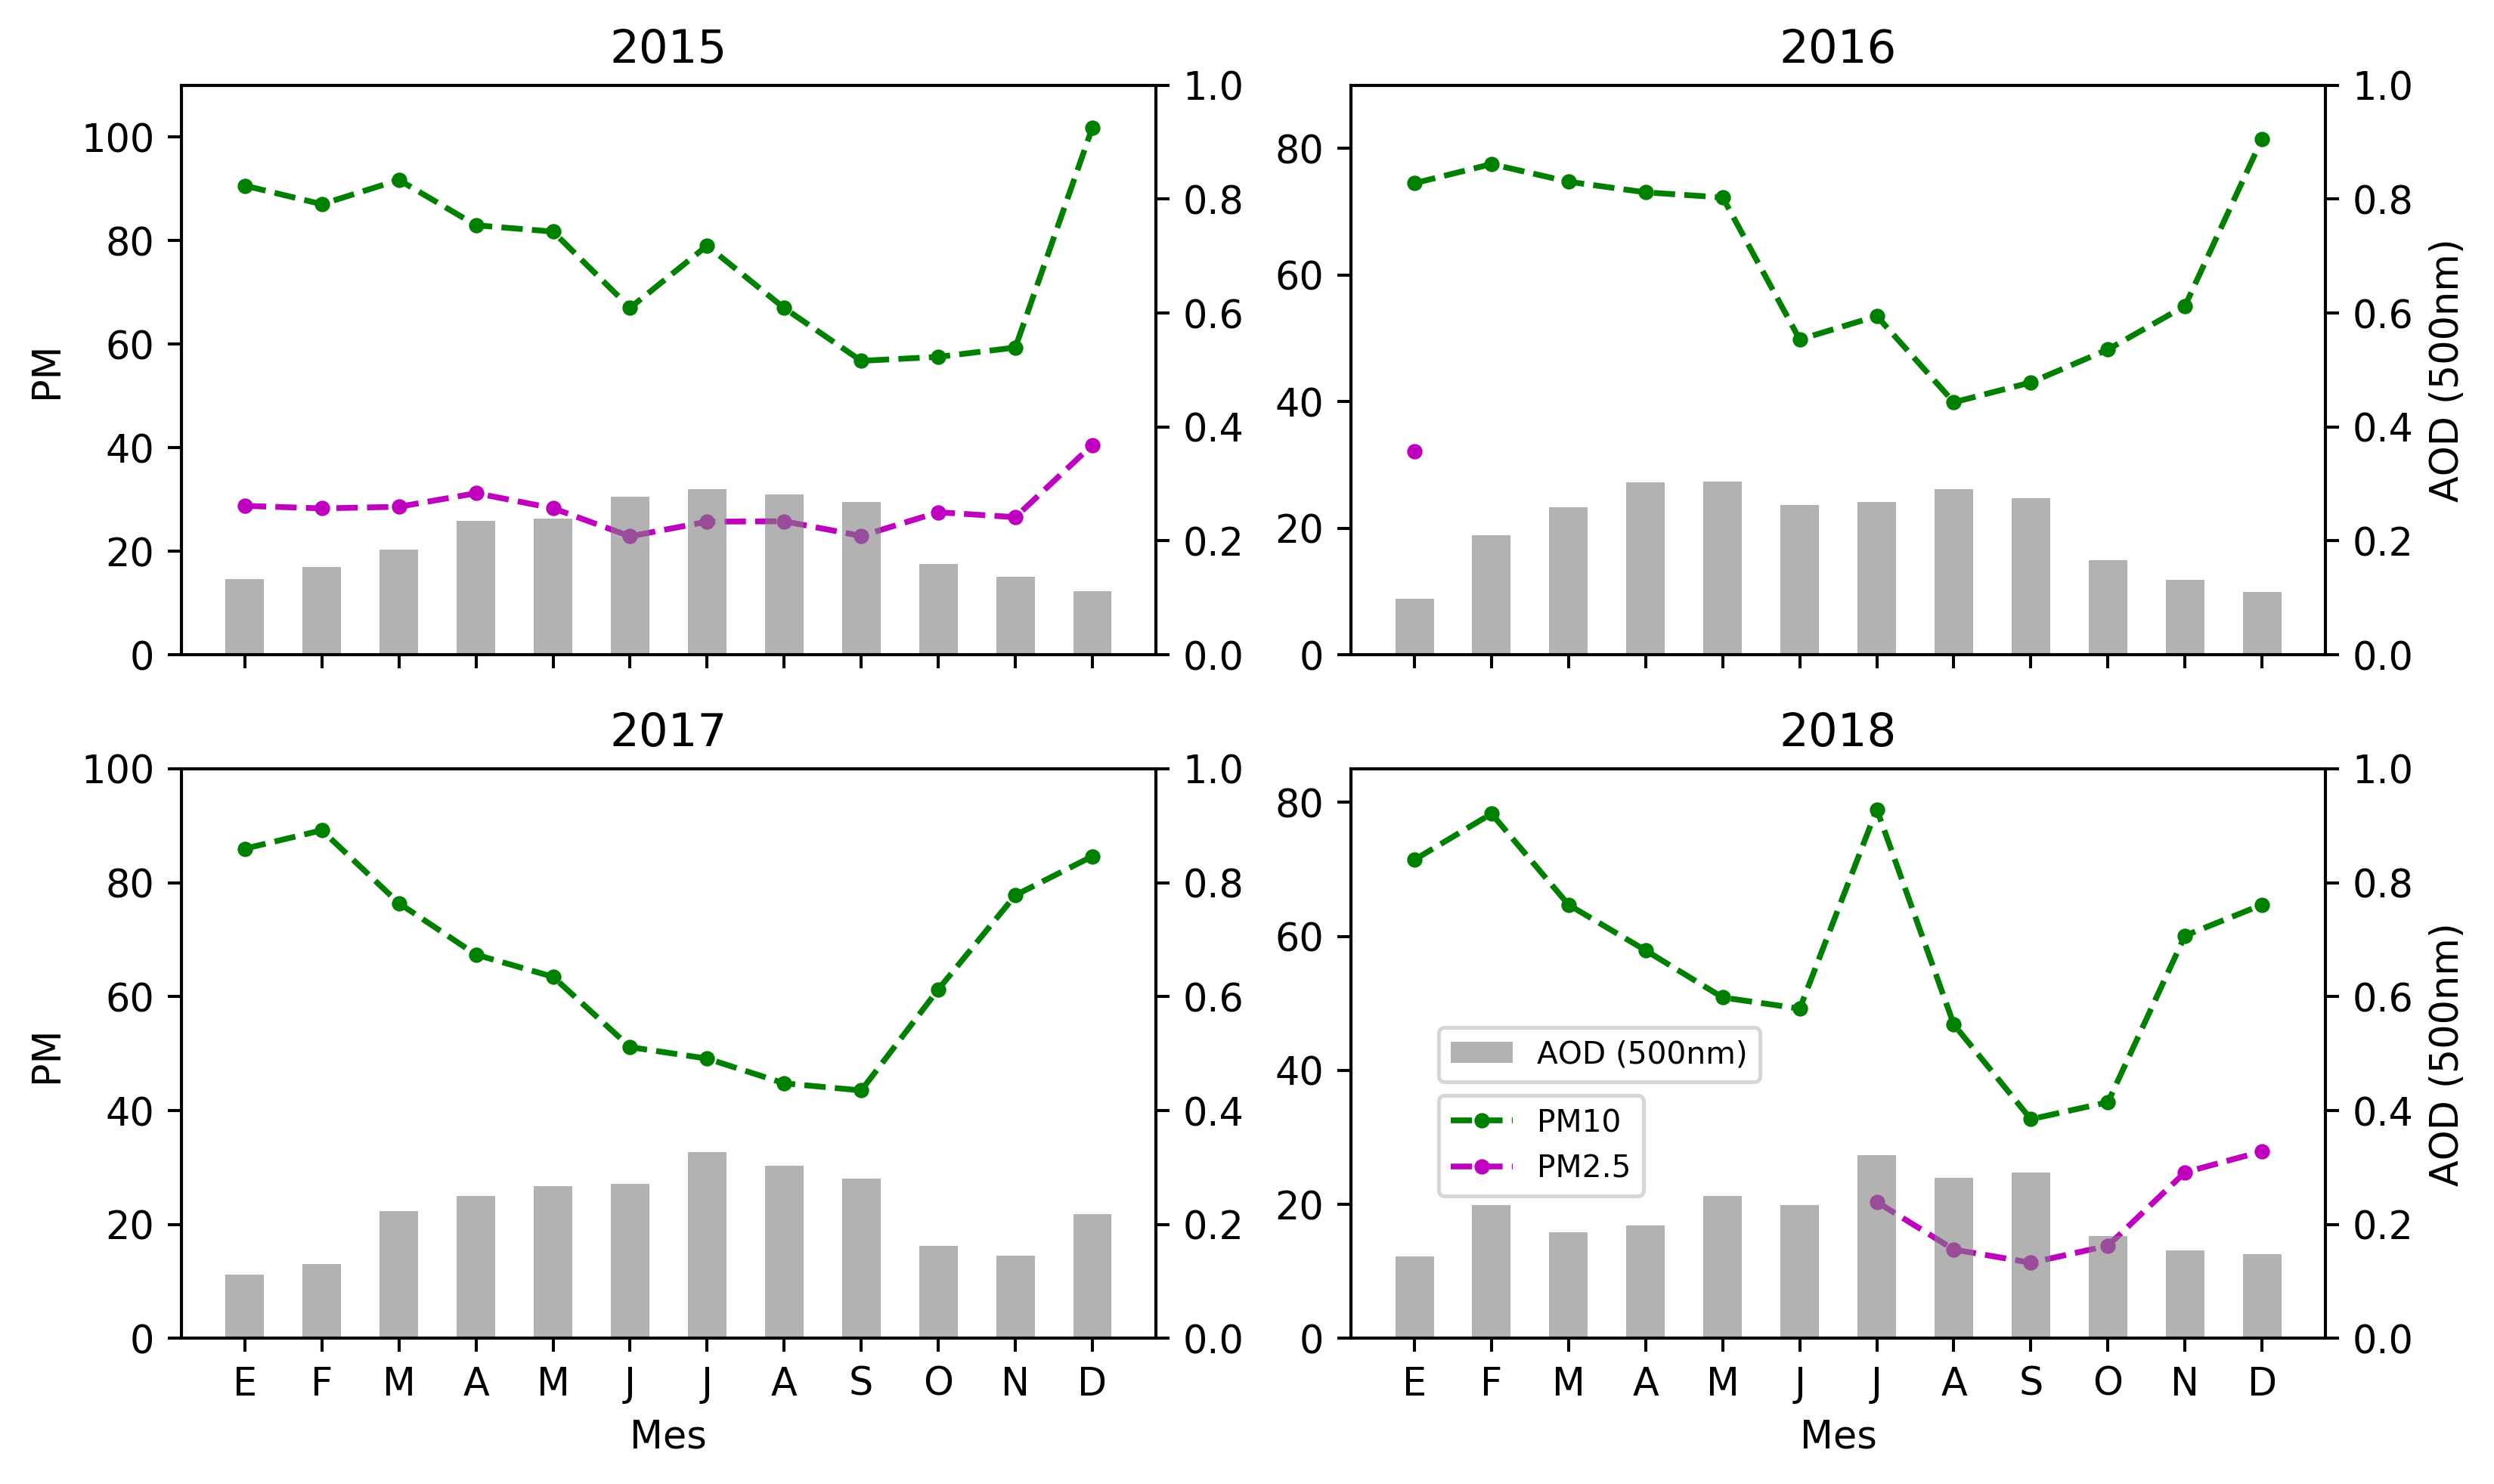

In [25]:
#MES 2015-2018
w=0.50
ano2015 = (PM_month.index > '2014-12-31') & (PM_month.index <= '2015-12-31')
dosmil15=PM_month.loc[ano2015]
AOD15=AOD_month.loc[ano2015]
ano2016 = (PM_month.index > '2015-12-31') & (PM_month.index <= '2016-12-31')
dosmil16=PM_month.loc[ano2016]
AOD16=AOD_month.loc[ano2016]
ano2017 = (PM_month.index > '2016-12-31') & (PM_month.index <= '2017-12-31')
dosmil17=PM_month.loc[ano2017]
AOD17=AOD_month.loc[ano2017]
ano2018 = (PM_month.index > '2017-12-31') & (PM_month.index <= '2018-12-31')
dosmil18=PM_month.loc[ano2018]
AOD18=AOD_month.loc[ano2018]

label=["E","F","M","A","M","J","J","A","S","O","N","D"]
x=np.arange(len(dosmil15.index))
fig, ((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(10,6),sharex=True,sharey=False,dpi=366)
ax1_5=ax1.twinx()
ax1_5.bar(x,AOD15["(25.5,-100.5)"],w,label="AOD (500nm)",color="gray",alpha=0.6)
ax1_5.set_ylim(0, 1)
ax1.plot(x ,dosmil15["PM10"],"g.--",label="PM10")
ax1.plot(x,dosmil15["PM2.5"],"m.--",label="PM2.5")
ax2.plot(x,dosmil16["PM10"],"g.--",label="PM10")
ax2_5=ax2.twinx()
ax2_5.bar(x,AOD16["(25.5,-100.5)"],w,label="AOD (500nm)",color="gray",alpha=0.6)
ax2_5.set_ylim(0, 1)
ax2.plot(x,dosmil16["PM2.5"],"m.--",label="PM2.5")
ax3.plot(x,dosmil17["PM10"],"g.--",label="PM10")
ax3.set_ylim(0, 100)
ax3_5=ax3.twinx()
ax3_5.bar(x,AOD17["(25.5,-100.5)"],w,label="AOD (500nm)",color="gray",alpha=0.6)
ax3_5.set_ylim(0, 1)
#ax3.bar(x,dosmil17["PM2.5"],w,label="PM2.5")
ax4.plot(x,dosmil18["PM10"],"g.--",label="PM10")
ax4_5=ax4.twinx()
ax4_5.bar(x,AOD18["(25.5,-100.5)"],w,label="AOD (500nm)",color="gray",alpha=0.6)
ax4_5.set_ylim(0, 1)
ax4.plot(x,dosmil18["PM2.5"],"m.--",label="PM2.5")
ax1.set_title('2015'); ax2.set_title('2016'); ax3.set_title('2017'); ax4.set_title('2018')
ax3.set_xlabel('Mes');  ax4.set_xlabel('Mes')
ax3.set_xticks(x)
ax3.set_xticklabels(label)
ax1_5.get_shared_y_axes().join(ax1_5, ax2_5,ax3_5,ax4_5)
ax1.set_ylim(0, 110);ax2.set_ylim(0, 90);ax3.set_ylim(0, 100);ax4.set_ylim(0, 85)
ax1.set_ylabel('PM'); ax3.set_ylabel('PM'); ax2_5.set_ylabel("AOD (500nm)");ax4_5.set_ylabel("AOD (500nm)")
#ax1.set_xlim(2015-1-1, 2015-12-31) ;  ax2.set_xlim(2016-1-1, 2016-12-31) 
ax4.legend(loc=(0.09,0.25),prop={'size': 8});ax4_5.legend(loc=(0.09,0.45),prop={'size': 8})
fig.savefig('Comportamiento-pm-aod.jpg')
plt.show()
#AL PARECER HUBO UNA TOLVANERA DEL SAHARA EN JULIO 2018

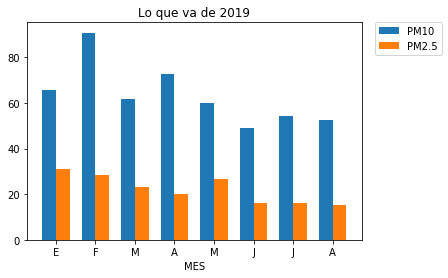

In [26]:
#MES 2019
ano2019 = (PM_month.index > '2018-12-31') & (PM_month.index <= '2019-12-31')
dosmil19=PM_month.loc[ano2019]
w=0.35
label=["E","F","M","A","M","J","J","A"]
x=np.arange(len(dosmil19.index))
fig, ax=plt.subplots()
ax.bar(x-w/2,dosmil19["PM10"],w,label="PM10")
ax.bar(x+w/2,dosmil19["PM2.5"],w,label="PM2.5")
ax.set_xticks(x)
ax.set_xticklabels(label)
ax.set_title('Lo que va de 2019')
ax.set_xlabel('MES')
ax.legend(loc=(1.04,0.85))
plt.show()

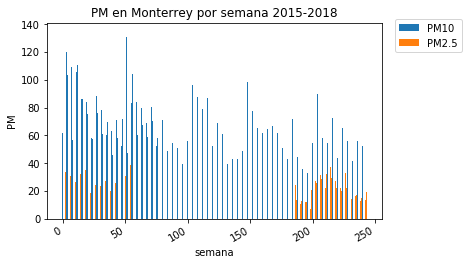

In [27]:
#SEMANA
w=0.30
x=np.arange(len(PM_week.index))
#y=np.arange(len(AOD_year.index))
fig=plt.figure()

ax=fig.add_subplot(111)
#ax1=ax.twinx()
ax.bar(x-w/2,PM_week["PM10"],w,label="PM10")
ax.bar(x+w/2,PM_week["PM2.5"],w,label="PM2.5")
#ax1.bar(y-w,AOD_year["(25.5,-100.5)"],w,label="AOD (500nm)",color="gray")
ax.set_title('PM en Monterrey por semana 2015-2018')
ax.set_xlabel('semana')
ax.legend(loc=(1.04,0.85))
#ax1.legend(loc=(1.04,1))
ax.set_ylabel('PM')
#ax1.set_ylabel('PM')
#ax.set_xticks(x)
#ax.set_xticklabels(PM_week.index)
#fig.tight_layout()
fig.autofmt_xdate()
plt.show()

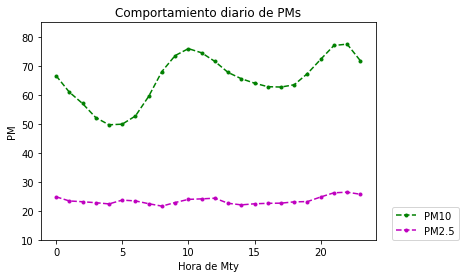

In [4]:
#COMPORTAMIENTO POR HORA PROMEDIO DE LOS 4 AÑOS
PM_hora=PMs.groupby(PMs.index.hour).mean()
fig,ax=plt.subplots()
ax.plot(PM_hora.index,PM_hora["PM10"],"g.--",label="PM10")
ax.plot(PM_hora.index,PM_hora["PM2.5"],"m.--",label="PM2.5")
ax.set_title('Comportamiento diario de PMs')
ax.set_xlabel('Hora de Mty')
ax.set_ylim(10, 85)
ax.set_ylabel('PM')
ax.legend(loc=(1.05,0))
#fig.savefig('ComportaMIENTESMEHACESDANOYLUEGOTEAR.jpg')
plt.show()

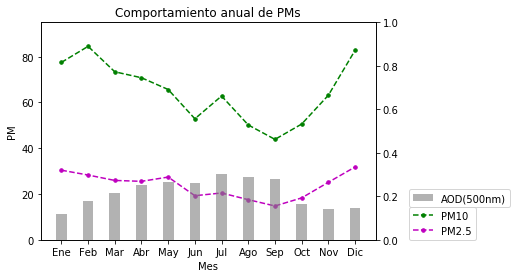

In [29]:
#COMPORTAMIENTO EN EL AÑO PROMEDIO DE LOS 4 AÑOS
meses=["Ene","Feb","Mar","Abr","May","Jun","Jul","Ago","Sep","Oct","Nov","Dic"]
PM_mes=PMs.groupby(PMs.index.month).mean()
AOD_mes=AOD.groupby(AOD.index.month).mean()
fig,ax=plt.subplots()
ax.plot(PM_mes.index,PM_mes["PM10"],"g.--",label="PM10",markersize=7)
ax.plot(PM_mes.index,PM_mes["PM2.5"],"m.--",label="PM2.5",markersize=7)
axO=ax.twinx()
axO.bar(AOD_mes.index,AOD_mes["(25.5,-100.5)"],0.40,color="gray",label="AOD(500nm)",alpha=0.6)
axO.set_ylim(0, 1)
ax.set_title('Comportamiento anual de PMs')
ax.set_xlabel('Mes')
ax.set_ylim(0, 95)
ax.set_ylabel('PM')
ax.legend(loc=(1.1,0))
axO.legend(loc=(1.1,0.15))
ax.set_xticks(PM_mes.index)
ax.set_xticklabels(meses)
fig.savefig('ComportaMIENTESMEHACESDANOYLUEGOTEAR.jpg')
plt.show()

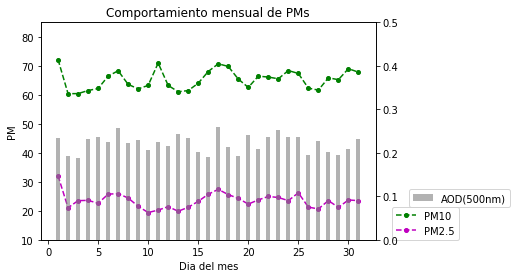

In [30]:
#COMPORTAMIENTO EN LOS DIAS DEL MES DE LOS 4 AÑOS
PM_dia=PMs.groupby(PMs.index.day).mean()
AOD_dia=AOD.groupby(AOD.index.day).mean()
fig,ax=plt.subplots()
ax.plot(PM_dia.index,PM_dia["PM10"],"g.--",label="PM10",markersize=8)
ax.plot(PM_dia.index,PM_dia["PM2.5"],"m.--",label="PM2.5",markersize=8)
axO=ax.twinx()
axO.bar(AOD_dia.index,AOD_dia["(25.5,-100.5)"],0.40,color="gray",label="AOD(500nm)",alpha=0.6)
axO.set_ylim(0, 0.5)
axO.legend(loc=(1.1,0.15))
ax.set_title('Comportamiento mensual de PMs')
ax.set_xlabel('Dia del mes')
ax.set_ylim(10, 85)
ax.set_ylabel('PM')
ax.legend(loc=(1.05,0))
#fig.savefig('ComportaMIENTESMEHACESDANOYLUEGOTEAR.jpg')
plt.show()

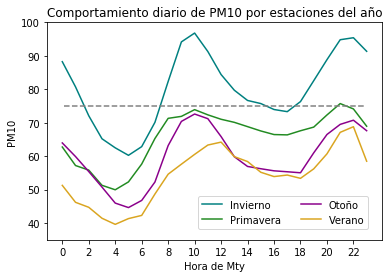

In [8]:
#SEASONAL HOUR THING de 2016
primavera =(PMs.index >= '2015-03-20') & (PMs.index < '2015-06-21') | (PMs.index >= '2016-03-19') & (PMs.index < '2016-06-20')|(PMs.index >= '2017-03-20') & (PMs.index < '2017-06-20')|(PMs.index >= '2018-03-20') & (PMs.index < '2018-06-21')|(PMs.index >= '2019-03-20') & (PMs.index < '2019-06-21')
verano = (PMs.index >= '2015-06-21') & (PMs.index < '2015-09-23') |(PMs.index >= '2016-06-20') & (PMs.index < '2016-09-22')|(PMs.index >= '2017-06-20') & (PMs.index < '2017-09-22')|(PMs.index >= '2018-06-21') & (PMs.index < '2018-09-22')|(PMs.index >= '2019-06-21') & (PMs.index < '2019-09-23')
otono = (PMs.index >= '2015-09-23') & (PMs.index < '2015-12-21')|(PMs.index >= '2016-09-22') & (PMs.index < '2016-12-21')|(PMs.index >= '2017-09-22') & (PMs.index < '2017-12-21')|(PMs.index >= '2018-09-22') & (PMs.index < '2018-12-21')
invierno = (PMs.index >= '2015-12-21') & (PMs.index < '2016-03-19')|(PMs.index >= '2016-12-21') & (PMs.index < '2017-03-20')|(PMs.index >= '2017-12-21') & (PMs.index < '2018-03-20')|(PMs.index >= '2018-12-21') & (PMs.index < '2019-03-20')|(PMs.index >= '2017-12-21') & (PMs.index < '2018-03-20')|(PMs.index >= '2015-01-01') & (PMs.index < '2015-03-20')
#Fechas segun https://www.calendardate.com
PMsummer=PMs.loc[verano]
PMfall=PMs.loc[otono]
PMwinter=PMs.loc[invierno]
PMspring=PMs.loc[primavera]
PMspring=PMspring.groupby(PMspring.index.hour).mean()
PMsummer=PMsummer.groupby(PMsummer.index.hour).mean()
PMfall=PMfall.groupby(PMfall.index.hour).mean()
PMwinter=PMwinter.groupby(PMwinter.index.hour).mean()

fig,ax=plt.subplots()
ax.plot(PMwinter.index,PMwinter["PM10"],"-",color="teal",label="Invierno")
ax.plot(PMspring.index,PMspring["PM10"],'-',color='forestgreen',label="Primavera")
ax.plot(PMfall.index,PMfall["PM10"],"-",color='darkmagenta',label="Otoño")
ax.plot(PMsummer.index,PMsummer["PM10"],"-",color='goldenrod',label="Verano")
#ax.plot(PM_hora.index,PM_hora["PM10"],"-",color='k',label="Promedio")
ax.axhline(y=75,xmin=0.05,xmax=0.95,linestyle="--",color="gray")
#label="NOM-025-SSA1"
ax.set_title('Comportamiento diario de PM10 por estaciones del año')
ax.set_xlabel('Hora de Mty')
ax.set_ylim(35, 100)
ax.set_ylabel('PM10')
ax.legend(loc=(0.45,0.05),ncol=2)
#prop={'size': 9}
plt.xticks(np.arange(0, 24, step=2))
#fig.subplots_adjust(left=0.3)
fig.savefig('Diaxestaciones.jpg',dpi=900)
plt.show()

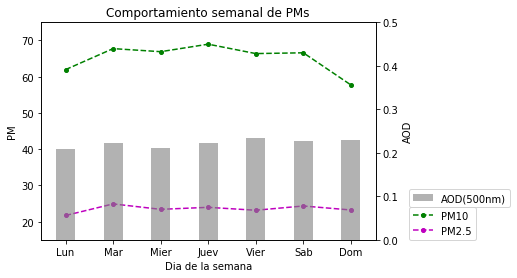

In [59]:
#COMPORTAMIENTO EN LA SEMANA DE LOS 4 AÑOS
week=["Lun","Mar","Mier","Juev","Vier","Sab","Dom"]
PM_semana=PMs.groupby(PMs.index.weekday).mean()
AOD_semana=AOD.groupby(AOD.index.weekday).mean()
fig,ax=plt.subplots()
ax.plot(PM_semana.index,PM_semana["PM10"],"g.--",label="PM10",markersize=8)
ax.plot(PM_semana.index,PM_semana["PM2.5"],"m.--",label="PM2.5",markersize=8)
axO=ax.twinx()
axO.bar(AOD_semana.index,AOD_semana["(25.5,-100.5)"],0.40,color="gray",label="AOD(500nm)",alpha=0.6)
axO.set_ylim(0, 0.5)
axO.legend(loc=(1.1,0.15));ax.legend(loc=(1.1,0))
ax.set_title('Comportamiento semanal de PMs')
ax.set_xlabel('Dia de la semana')
ax.set_ylim(15, 75)
ax.set_ylabel('PM');axO.set_ylabel("AOD")
ax.set_xticks(PM_semana.index)
ax.set_xticklabels(week)
plt.show()
#EL AOD NO TIENE NINGÚN COMPORTAMIENTO PREDOMINANTE #PM2.5 TAMPOCO

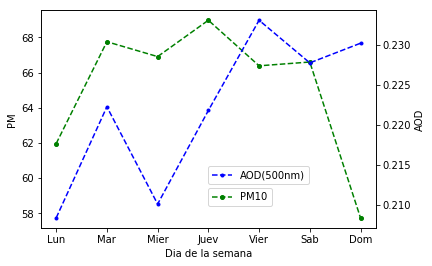

In [61]:
#LA SEMANA DE SOLO PM10
fig,ax=plt.subplots()
ax.plot(PM_semana.index,PM_semana["PM10"],"g.--",label="PM10",markersize=8)
#ax.plot(PM_semana.index,PM_semana["PM2.5"],"m.--",label="PM2.5",markersize=8)
ax0=ax.twinx()
ax0.plot(AOD_semana.index,AOD_semana["(25.5,-100.5)"],"b.--",label="AOD(500nm)")
ax.set_xticks(PM_semana.index)
ax.set_xticklabels(week)
ax.legend(loc=(0.5,0.1));ax0.legend(loc=(0.5,0.2))
ax.set_ylabel('PM');ax0.set_ylabel("AOD")
ax.set_xlabel('Dia de la semana')
plt.show()

In [70]:
PMs.index.weekday

Int64Index([3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
            ...
            5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
           dtype='int64', length=40896)

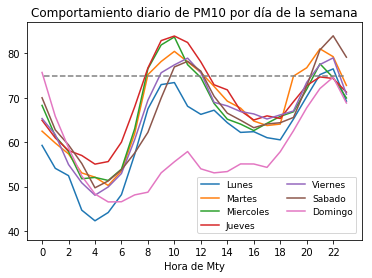

In [11]:
lunes=(PMs.index.weekday == 0)
martes=(PMs.index.weekday == 1)
mier=(PMs.index.weekday == 2)
jueves=(PMs.index.weekday == 3)
viernes=(PMs.index.weekday == 4)
sabado=(PMs.index.weekday == 5)
domingo=(PMs.index.weekday == 6)
PMlun=PMs.loc[lunes]
PMmar=PMs.loc[martes]
PMmier=PMs.loc[mier]
PMjuev=PMs.loc[jueves]
PMvier=PMs.loc[viernes]
PMsab=PMs.loc[sabado]
PMdom=PMs.loc[domingo]
PMlun=PMlun.groupby(PMlun.index.hour).mean()
PMmar=PMmar.groupby(PMmar.index.hour).mean()
PMmier=PMmier.groupby(PMmier.index.hour).mean()
PMjuev=PMjuev.groupby(PMjuev.index.hour).mean()
PMvier=PMvier.groupby(PMvier.index.hour).mean()
PMsab=PMsab.groupby(PMsab.index.hour).mean()
PMdom=PMdom.groupby(PMdom.index.hour).mean()

fig,ax=plt.subplots()
ax.plot(PMlun.index,PMlun["PM10"],"-",label="Lunes")
ax.plot(PMmar.index,PMmar["PM10"],'-',label="Martes")
ax.plot(PMmier.index,PMmier["PM10"],"-",label="Miercoles")
ax.plot(PMjuev.index,PMjuev["PM10"],"-",label="Jueves")
ax.plot(PMvier.index,PMvier["PM10"],"-",label="Viernes")
ax.plot(PMsab.index,PMsab["PM10"],"-",label="Sabado")
ax.plot(PMdom.index,PMdom["PM10"],"-",label="Domingo")
#ax.plot(PM_hora.index,PM_hora["PM10"],"-",color='k',label="Promedio")
ax.axhline(y=75,xmin=0.05,xmax=0.95,linestyle="--",color="gray")
#label="NOM-025-SSA1"
ax.set_title('Comportamiento diario de PM10 por día de la semana')
ax.set_xlabel('Hora de Mty')
ax.set_ylim(38, 87)
#ax.set_ylabel('PM10')
ax.legend(loc=(0.508,0.03),ncol=2,prop={'size': 9})
plt.xticks(np.arange(0, 24, step=2))
#fig.subplots_adjust(left=0.3)
fig.savefig('Diaxweekday.jpg',dpi=900)
plt.show()